In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy, ROOT

import os, sys
sys.path.append('../functions')

Welcome to ROOTaaS 6.06/08


# Functions

In [3]:
def initialize(fGeo):
    
    debug = 0
    #creates a dictionary with z coordinates of layers
    #and variables with station start/end coordinates
    #to be called once at the beginning of the eventloop
    i1=1 #1st layer
    i2=16 #last layer
    zlayer={} #dictionary with z coordinates of station1,2 layers
    zlayerv2={} #z-positions for stereo views
    z34layer={} #dictionary with z coordinates of station3,4 layers
    z34layerv2={} #z-positions for stereo views
    TStation1StartZ=0.
    TStation4EndZ=0.
    VetoStationZ=0.
    VetoStationEndZ=0.
   
    fgeo=fGeo 
    #z-positions of Y-view tracking
    #4 stations, 4 views (Y,u,v,Y); each view has 2 planes and each plane has 2 layers

    for i in range(i1,i2+1):
        TStationz = ShipGeo.TrackStation1.z
        if (i>8) : 
            TStationz = ShipGeo.TrackStation2.z  
        # Y: vnb=0 or 3   
        vnb=0.
        if (i>4): vnb=3.
        if (i>8): vnb=0.
        if (i>12): vnb=3.
        lnb = 0.  
        if (i % 2 == 0) : lnb=1.
        pnb=0.
        if (i==3 or i==4 or i==7 or i==8 or i==11 or i==12 or i==15 or i==16) : pnb=1.

        #z positions of Y view of stations   
        Zpos = TStationz+(vnb-3./2.)*ShipGeo.strawtubes.DeltazView+(float(pnb)-1./2.)*ShipGeo.strawtubes.DeltazPlane+(float(lnb)-1./2.)*ShipGeo.strawtubes.DeltazLayer 
        zlayer[i]=[Zpos]

    #z-positions for stereo views

    for i in range(i1,i2+1):
        TStationz = ShipGeo.TrackStation1.z
        if (i>8) : 
            TStationz = ShipGeo.TrackStation2.z   
        #stereo views: vnb=1 or 2  
        vnb=1.
        if (i>4): vnb=2.
        if (i>8): vnb=1.
        if (i>12): vnb=2. 
        lnb = 0.  
        if (i % 2 == 0) : lnb=1.
        pnb=0.
        if (i==3 or i==4 or i==7 or i==8 or i==11 or i==12 or i==15 or i==16) : pnb=1.

        #z positions of u,v view of stations   
        Zpos_u = TStationz+(vnb-3./2.)*ShipGeo.strawtubes.DeltazView+(float(pnb)-1./2.)*ShipGeo.strawtubes.DeltazPlane+(float(lnb)-1./2.)*ShipGeo.strawtubes.DeltazLayer 
        zlayerv2[i]=[Zpos_u]


    for i in range(i1,i2+1):
        TStationz = ShipGeo.TrackStation3.z
        if (i>8) : 
            TStationz = ShipGeo.TrackStation4.z  
        # Y: vnb=0 or 3   
        vnb=0.
        if (i>4): vnb=3.
        if (i>8): vnb=0.
        if (i>12): vnb=3. 
        lnb = 0.  
        if (i % 2 == 0) : lnb=1.
        pnb=0.
        if (i==3 or i==4 or i==7 or i==8 or i==11 or i==12 or i==15 or i==16) : pnb=1.

        #z positions of x1 view of stations   
        Zpos = TStationz+(vnb-3./2.)*ShipGeo.strawtubes.DeltazView+(float(pnb)-1./2.)*ShipGeo.strawtubes.DeltazPlane+(float(lnb)-1./2.)*ShipGeo.strawtubes.DeltazLayer 
        z34layer[i]=[Zpos]


    for i in range(i1,i2+1):
        #zlayerv2[i]=[i*100.+50.]
        TStationz = ShipGeo.TrackStation3.z
        if (i>8) : 
            TStationz = ShipGeo.TrackStation4.z   
        #stereo views: vnb=1 or 2  
        vnb=1.
        if (i>4): vnb=2.
        if (i>8): vnb=1.
        if (i>12): vnb=2. 
        lnb = 0.  
        if (i % 2 == 0) : lnb=1.
        pnb=0.
        if (i==3 or i==4 or i==7 or i==8 or i==11 or i==12 or i==15 or i==16) : pnb=1.

        #z positions of u,v view of stations   
        Zpos_u = TStationz+(vnb-3./2.)*ShipGeo.strawtubes.DeltazView+(float(pnb)-1./2.)*ShipGeo.strawtubes.DeltazPlane+(float(lnb)-1./2.)*ShipGeo.strawtubes.DeltazLayer 
        z34layerv2[i]=[Zpos_u]

    VetoStationZ = ShipGeo.vetoStation.z
    if debug==1: print "VetoStation midpoint z=",VetoStationZ
    VetoStationEndZ=VetoStationZ+(ShipGeo.strawtubes.DeltazView+ShipGeo.strawtubes.OuterStrawDiameter)/2
    for i in range(1,5):   
        if i==1: TStationz = ShipGeo.TrackStation1.z
        if i==2: TStationz = ShipGeo.TrackStation2.z  
        if i==3: TStationz = ShipGeo.TrackStation3.z  
        if i==4: TStationz = ShipGeo.TrackStation4.z 
        if debug==1:
            print "TrackStation",i," midpoint z=",TStationz 
        for vnb in range(0,4):
            for pnb in range (0,2):
                for lnb in range (0,2):
                    Zpos = TStationz+(vnb-3./2.)*ShipGeo.strawtubes.DeltazView+(float(pnb)-1./2.)*ShipGeo.strawtubes.DeltazPlane+(float(lnb)-1./2.)*ShipGeo.strawtubes.DeltazLayer 
                    print "TStation=",i,"view=",vnb,"plane=",pnb,"layer=",lnb,"z=",Zpos

    TStation1StartZ=zlayer[1][0]-ShipGeo.strawtubes.OuterStrawDiameter/2
    TStation4EndZ=z34layer[16][0]+ShipGeo.strawtubes.OuterStrawDiameter/2

    return zlayer,zlayerv2,z34layer,z34layerv2,TStation1StartZ,TStation4EndZ,VetoStationZ,VetoStationEndZ

In [4]:
PDG=ROOT.TDatabasePDG.Instance() 
def getReconstructibleTracks(iEvent,sTree,sGeo, reconstructiblerequired, threeprong, TStation1StartZ,TStation4EndZ,VetoStationZ,VetoStationEndZ):
  debug = 0

  #returns a list of reconstructible tracks for this event
  #call this routine once for each event before smearing
  MCTrackIDs=[]
  rc = sTree.GetEvent(iEvent) 
  nMCTracks = sTree.MCTrack.GetEntriesFast()   

  if debug==1: print "event nbr",iEvent,"has",nMCTracks,"tracks"
  #1. MCTrackIDs: list of tracks decaying after the last tstation and originating before the first
  for i in reversed(range(nMCTracks)):
     atrack = sTree.MCTrack.At(i) 
     #for 3 prong decays check if its a nu
     if threeprong == 1:    
       if PDG.GetParticle(atrack.GetPdgCode()):          
         if PDG.GetParticle(atrack.GetPdgCode()).GetName()[:5]=="nu_mu":
	     if (atrack.GetStartZ() < TStation1StartZ and  atrack.GetStartZ() > VetoStationEndZ) and i not in MCTrackIDs:
	        MCTrackIDs.append(i)
         else:	
           if atrack.GetStartZ() > TStation4EndZ :         
             motherId=atrack.GetMotherId() 
	     if motherId > -1 : 
	       mothertrack=sTree.MCTrack.At(motherId)	
	       mothertrackZ=mothertrack.GetStartZ() 
	       #this mother track is a HNL decay 	      
	       #track starts inside the decay volume? (after veto, before 1 st tstation)
               if mothertrackZ < TStation1StartZ and mothertrackZ > VetoStationEndZ:
	         if motherId not in MCTrackIDs:
	           MCTrackIDs.append(motherId)	
     else:    
       #track endpoint after tstations?
       if atrack.GetStartZ() > TStation4EndZ :       
         motherId=atrack.GetMotherId() 
	 if motherId > -1 : 
	     mothertrack=sTree.MCTrack.At(motherId)	
	     mothertrackZ=mothertrack.GetStartZ() 
	     #this mother track is a HNL decay 	      
	     #track starts inside the decay volume? (after veto, before 1 st tstation)
             if mothertrackZ < TStation1StartZ and mothertrackZ > VetoStationEndZ:
	       if motherId not in MCTrackIDs:
	           MCTrackIDs.append(motherId)
  if debug==1: print "Tracks with origin in decay volume",MCTrackIDs	 
  if len(MCTrackIDs)==0: return MCTrackIDs
    
  #2. hitsinTimeDet: list of tracks with hits in TimeDet	   
  nVetoHits = sTree.vetoPoint.GetEntriesFast() 
  hitsinTimeDet=[]
  for i in range(nVetoHits):
     avetohit = sTree.vetoPoint.At(i)
     #hit in TimeDet?
     if sGeo.FindNode(avetohit.GetX(),avetohit.GetY(),avetohit.GetZ()).GetName() == 'TimeDet_1':
        if avetohit.GetTrackID() not in hitsinTimeDet:
	   hitsinTimeDet.append(avetohit.GetTrackID())
	 
  #3. Remove tracks from MCTrackIDs that are not in hitsinTimeDet 	
  itemstoremove=[]
  for item in MCTrackIDs:
      if threeprong==1:
        #don't remove the nu
        if PDG.GetParticle(sTree.MCTrack.At(item).GetPdgCode()).GetName()[:5]!="nu_mu" and item not in hitsinTimeDet:  
       	  itemstoremove.append(item)       
      else :
        if item not in hitsinTimeDet:
          itemstoremove.append(item)
  for item in itemstoremove:
      MCTrackIDs.remove(item)	   	  	  

  if debug==1: print "Tracks with hits in timedet",MCTrackIDs 
  if len(MCTrackIDs)==0: return MCTrackIDs
  #4. Find straws that have multiple hits
  nHits = sTree.strawtubesPoint.GetEntriesFast()  
  hitstraws={}
  duplicatestrawhit=[]
  if debug==1: print "Nbr of Rawhits=",nHits

  for i in range(nHits):
    ahit = sTree.strawtubesPoint[i]
    if (str(ahit.GetDetectorID())[:1]=="5") : 
       if debug==1: print "Hit in straw Veto detector. Rejecting."
       continue
    strawname=str(ahit.GetDetectorID())
    
    if hitstraws.has_key(strawname):
       #straw was already hit
       if ahit.GetX()>hitstraws[strawname][1]:
          #this hit has higher x, discard it
          duplicatestrawhit.append(i)
       else:
          #del hitstraws[strawname] 
	  duplicatestrawhit.append(hitstraws[strawname][0])
          hitstraws[strawname]=[i,ahit.GetX()]	        
    else: 
       hitstraws[strawname]=[i,ahit.GetX()]
  
  #5. Split hits up by station and outside stations
  hits1={}
  hits2={}
  hits3={}
  hits4={}
  trackoutsidestations=[]
  for i in range(nHits):
    if i in  duplicatestrawhit: 
       if debug==1: print "Duplicate hit",i,"not reconstructible, rejecting."
       continue  
    ahit = sTree.strawtubesPoint[i] 
    #is hit inside acceptance? if not mark the track as bad   
    if (((ahit.GetX()/245.)**2 + (ahit.GetY()/495.)**2) >= 1.): 
       if ahit.GetTrackID() not in trackoutsidestations:
          trackoutsidestations.append(ahit.GetTrackID())
    if ahit.GetTrackID() not in MCTrackIDs:
       #hit on not reconstructible track
       if debug==1: print "Hit not on reconstructible track. Rejecting."
       continue	  
    #group hits per tracking station, key = trackid
    if str(ahit.GetDetectorID())[:1]=="1" :
       if hits1.has_key(ahit.GetTrackID()):
            hits1[ahit.GetTrackID()]=[hits1[ahit.GetTrackID()][0],i]
       else:  
            hits1[ahit.GetTrackID()]=[i]    
    if str(ahit.GetDetectorID())[:1]=="2" :
       if hits2.has_key(ahit.GetTrackID()):
            hits2[ahit.GetTrackID()]=[hits2[ahit.GetTrackID()][0],i]
       else:  
            hits2[ahit.GetTrackID()]=[i]   
    if str(ahit.GetDetectorID())[:1]=="3" :
       if hits3.has_key(ahit.GetTrackID()):
            hits3[ahit.GetTrackID()]=[hits3[ahit.GetTrackID()][0],i]
       else:  
            hits3[ahit.GetTrackID()]=[i]           
    if str(ahit.GetDetectorID())[:1]=="4" :
       if hits4.has_key(ahit.GetTrackID()):
            hits4[ahit.GetTrackID()]=[hits4[ahit.GetTrackID()][0],i]
       else:  
            hits4[ahit.GetTrackID()]=[i] 
	    
  #6. Make list of tracks with hits in in station 1,2,3 & 4	    	
  tracks_with_hits_in_all_stations=[]  
  for key in hits1.keys():
      if (hits2.has_key(key) and hits3.has_key(key) ) and hits4.has_key(key):
         if key not in tracks_with_hits_in_all_stations and key not in trackoutsidestations:
            tracks_with_hits_in_all_stations.append(key) 
  for key in hits2.keys():
      if (hits1.has_key(key) and hits3.has_key(key) ) and hits4.has_key(key):
         if key not in tracks_with_hits_in_all_stations and key not in trackoutsidestations:
            tracks_with_hits_in_all_stations.append(key) 
  for key in hits3.keys():
      if ( hits2.has_key(key) and hits1.has_key(key) ) and hits4.has_key(key):
         if key not in tracks_with_hits_in_all_stations and key not in trackoutsidestations:
            tracks_with_hits_in_all_stations.append(key) 
  for key in hits4.keys():
      if (hits2.has_key(key) and hits3.has_key(key)) and hits1.has_key(key):
         if key not in tracks_with_hits_in_all_stations and key not in trackoutsidestations:
            tracks_with_hits_in_all_stations.append(key) 
 
  #7. Remove tracks from MCTrackIDs with hits outside acceptance or doesn't have hits in all stations 	   	  	  
  itemstoremove=[]
  for item in MCTrackIDs:	
      if threeprong==1:
        #don't remove the nu
        if PDG.GetParticle(sTree.MCTrack.At(item).GetPdgCode()).GetName()[:5]!="nu_mu" and item not in tracks_with_hits_in_all_stations:  
       	  itemstoremove.append(item)      
      else:
        if item not in tracks_with_hits_in_all_stations:
          itemstoremove.append(item)
  for item in itemstoremove:
      MCTrackIDs.remove(item)	

  if debug==1: 
     print "tracks_with_hits_in_all_stations",tracks_with_hits_in_all_stations
     print "Tracks with hits in all stations & inside acceptance ellipse",MCTrackIDs   
  if len(MCTrackIDs)==0: return MCTrackIDs   
  nbrechits=0	    
  for i in range(nHits):
    if i in  duplicatestrawhit: 
       continue 
    nbrechits+=1    
    ahit = sTree.strawtubesPoint[i] 	
    if ahit.GetTrackID()>-1 and ahit.GetTrackID() in MCTrackIDs:   	   	   
      atrack = sTree.MCTrack.At(ahit.GetTrackID())
      for j in range(ahit.GetTrackID()+1,nMCTracks) :
        childtrack = sTree.MCTrack.At(j)
        if childtrack.GetMotherId() == ahit.GetTrackID():	   
	    trackmomentum=atrack.GetP()
	    trackweight=atrack.GetWeight()
	    #rc=h['reconstructiblemomentum'].Fill(trackmomentum,trackweight)
	    motherId=atrack.GetMotherId() 
	    if motherId==1 :
		HNLmomentum=sTree.MCTrack.At(1).GetP()
		#rc=h['HNLmomentumvsweight'].Fill(trackweight,HNLmomentum) 
	        if j==nMCTracks :
 		     trackmomentum=atrack.GetP()
		     trackweight=atrack.GetWeight()
		     #rc=h['reconstructiblemomentum'].Fill(trackmomentum,trackweight)
		     if atrack.GetMotherId()==1 :
		       HNLmomentum=sTree.MCTrack.At(1).GetP()
		       #rc=h['HNLmomentumvsweight'].Fill(trackweight,HNLmomentum)
  itemstoremove=[]
  for item in MCTrackIDs:	       
    atrack = sTree.MCTrack.At(item)
    motherId=atrack.GetMotherId() 
    if motherId != 2: #!!!!
        itemstoremove.append(item)
  for item in itemstoremove:
      MCTrackIDs.remove(item)	
      if debug==1: print "After removing the non HNL track, MCTrackIDs",MCTrackIDs
  if debug==1: print "Tracks with HNL mother",MCTrackIDs 
  
  #8. check if the tracks are HNL children 
  mufound=0
  pifound=0 
  nu_mufound=0
  itemstoremove=[]
  if MCTrackIDs:
    for item in MCTrackIDs: 
      try: 
        if PDG.GetParticle(sTree.MCTrack.At(item).GetPdgCode()).GetName()[:2]=="mu"   : mufound+=1	
        if PDG.GetParticle(sTree.MCTrack.At(item).GetPdgCode()).GetName()[:2]=="pi"   : pifound+=1 
        if PDG.GetParticle(sTree.MCTrack.At(item).GetPdgCode()).GetName()[:5]=="nu_mu": 
	   nu_mufound+=1  
	   itemstoremove.append(item)
      except:
        if debug==1: print "Unknown particle with pdg code:",sTree.MCTrack.At(item).GetPdgCode()	
    if reconstructiblerequired == 1 :
      if mufound!=1  and pifound!=1: 
          if debug==1: print "No reconstructible pion or muon." 
	  MCTrackIDs=[]   
    if reconstructiblerequired == 2 : 
      if threeprong == 1 :       
          if mufound!=2 or nu_mufound!=1 : 
            if debug==1: print "No reconstructible mu-mu-nu."  
	    MCTrackIDs=[]
	  else:
	    #remove the neutrino from MCTrackIDs for the rest
	    for item in itemstoremove:
               MCTrackIDs.remove(item)	
      else:         
          if mufound!=1 or pifound!=1 : 
            if debug==1: print "No reconstructible pion and muon."  
	    MCTrackIDs=[]     
  if len(MCTrackIDs)>0:
     #rc=h['nbrhits'].Fill(nHits)
     #rc=h['nbrtracks'].Fill(nMCTracks)
     pass
  if debug==1: print "Tracks with required HNL decay particles",MCTrackIDs 	     
  return MCTrackIDs

In [5]:
random = ROOT.TRandom()
ROOT.gRandom.SetSeed(13)

def smearHits(sTree, modules, no_amb=None):
    
    # smear strawtube points
    SmearedHits = []
    key = -1
    
    for ahit in sTree.strawtubesPoint:
        
        key+=1
        detID = ahit.GetDetectorID()
        top = ROOT.TVector3()
        bot = ROOT.TVector3()
        
        modules["Strawtubes"].StrawEndPoints(detID,bot,top)
        
        #distance to wire, and smear it.
        dw  = ahit.dist2Wire()
        smear = dw
        if not no_amb:
            random = ROOT.TRandom()
            smear = abs(random.Gaus(dw,ShipGeo.strawtubes.sigma_spatial))
            
        SmearedHits.append( {'digiHit':key,'xtop':top.x(),'ytop':top.y(),'z':top.z(),'xbot':bot.x(),'ybot':bot.y(),'dist':smear} )
        

    return SmearedHits

In [6]:
def Digitization(sTree,SmearedHits):

    Hits = []
    
    for i in range(len(SmearedHits)):
        xtop=SmearedHits[i]['xtop']
        xbot=SmearedHits[i]['xbot']
        ytop=SmearedHits[i]['ytop']
        ybot=SmearedHits[i]['ybot']
        ztop=SmearedHits[i]['z'] 
        zbot=SmearedHits[i]['z']
        distance=SmearedHits[i]['dist']
        detid=sTree.strawtubesPoint[i].GetDetectorID()
        
        ahit=[xtop, ytop, ztop, xbot, ybot, zbot, float(distance), int(detid)]
        Hits.append(ahit)

    return numpy.array(Hits)

In [7]:
def prepare_theTrack(hitPosList, charge, pinv):
    
    nM = len(hitPosList)

    if int(charge)<0:
        pdg=13
    else:
        pdg=-13   
    rep = ROOT.genfit.RKTrackRep(pdg)   
    posM = ROOT.TVector3(0, 0, 0)
    #would be the correct way but due to uncertainties on small angles the sqrt is often negative
    if abs(pinv) > 0.0 : momM = ROOT.TVector3(0,0,int(charge)/pinv)
    else: momM = ROOT.TVector3(0,0,999)   
    covM = ROOT.TMatrixDSym(6)
    resolution = ShipGeo.strawtubes.sigma_spatial  
    for  i in range(3):   covM[i][i] = resolution*resolution
    covM[0][0]=resolution*resolution*100.
    for  i in range(3,6): covM[i][i] = ROOT.TMath.Power(resolution / nM / ROOT.TMath.Sqrt(3), 2)
    # smeared start state  
    stateSmeared = ROOT.genfit.MeasuredStateOnPlane(rep)
    rep.setPosMomCov(stateSmeared, posM, momM, covM)
    # create track
    seedState = ROOT.TVectorD(6)
    seedCov   = ROOT.TMatrixDSym(6)
    rep.get6DStateCov(stateSmeared, seedState, seedCov)
    theTrack=ROOT.genfit.Track(rep, seedState, seedCov) 

    return theTrack

In [8]:
from array import array
import shipunit  as u
import math

def TrackFit(hitPosList,theTrack,charge,pinv, theTracks): 
    debug=1
    #if debug==1: fitter.setDebugLvl(1)
    resolution = ShipGeo.strawtubes.sigma_spatial    
    hitCov = ROOT.TMatrixDSym(7)
    hitCov[6][6] = resolution*resolution
    
    for item in hitPosList:
        
        itemarray=array('d',[item[0],item[1],item[2],item[3],item[4],item[5],item[6]])
        ms=ROOT.TVectorD(7,itemarray) 
        tp = ROOT.genfit.TrackPoint(theTrack) # note how the point is told which track it belongs to 
        measurement = ROOT.genfit.WireMeasurement(ms,hitCov,1,6,tp) # the measurement is told which trackpoint it belongs to
        measurement.setMaxDistance(0.5*u.cm)     
        tp.addRawMeasurement(measurement) # package measurement in the TrackPoint                                          
        theTrack.insertPoint(tp)  # add point to Track
        
    
    theTracks.append(theTrack)
    if not debug == 1: 
        return # leave track fitting shipDigiReco
#check
    if not theTrack.checkConsistency():
        if debug==1: print 'Problem with track before fit, not consistent',theTrack
        return
# do the fit
    try:  
        fitter.processTrack(theTrack)
    except: 
        if debug==1: print "genfit failed to fit track"
        return
#check
    if not theTrack.checkConsistency():
        if debug==1: print 'Problem with track after fit, not consistent',theTrack
        return  
    
      
    fitStatus   = theTrack.getFitStatus()
    theTrack.prune("CFL")  #  http://sourceforge.net/p/genfit/code/HEAD/tree/trunk/core/include/Track.h#l280 

    nmeas = fitStatus.getNdf()
    pval = fitStatus.getPVal()

    #pval close to 0 indicates a bad fit
    chi2        = fitStatus.getChi2()/nmeas 


    fittedState = theTrack.getFittedState()
    fittedMom = fittedState.getMomMag()  
    fittedMom = fittedMom*int(charge) 
      
    return 

In [9]:
def fracMCsame(trackids):
    
    track={}
    nh=len(trackids)
    for tid in trackids:
        if tid==999: 
            nh-=1
            continue
        if track.has_key(tid):
            track[tid]+=1
        else:
            track[tid]=1
    #now get track with largest number of hits
    tmax=max(track, key=track.get)

    frac=0.
    if nh>0: frac=float(track[tmax])/float(nh)
    return frac,tmax 

In [10]:
def get_track_ids(stree, smeared_hits):
    
    y = []
    
    for i in range(len(smeared_hits)):
        
        track_id = stree.strawtubesPoint[i].GetTrackID()
        y.append(track_id)
        
    return numpy.array(y)

# Execute

In [11]:
input_file = "../../ship.conical.Pythia8-TGeant4.root"
geo_file = "../../geofile_full.conical.Pythia8-TGeant4.root"

## sGeo

In [12]:
fgeo = ROOT.TFile(geo_file)
sGeo = fgeo.FAIRGeom

Info in <TGeoManager::CloseGeometry>: Geometry loaded from file...
Info in <TGeoManager::SetTopVolume>: Top volume is cave. Master volume is cave
Info in <TGeoNavigator::BuildCache>: --- Maximum geometry depth set to 100
Info in <TGeoManager::Voxelize>: Voxelizing...
Info in <TGeoManager::CountLevels>: max level = 8, max placements = 1850
Info in <TGeoManager::CloseGeometry>: 8882882 nodes/ 993 volume UID's in FAIR geometry
Info in <TGeoManager::CloseGeometry>: ----------------modeler ready----------------


## sTree

In [13]:
fn = ROOT.TFile(input_file,'update')
sTree = fn.cbmsim

## ShipGeo

In [14]:
from ShipGeoConfig import ConfigRegistry
from rootpyPickler import Unpickler

dy  = None

if not fgeo.FindKey('ShipGeo'):
    
    # old geofile, missing Shipgeo dictionary
    if sGeo.GetVolume('EcalModule3') :  
        ecalGeoFile = "ecal_ellipse6x12m2.geo"
    else: 
        ecalGeoFile = "ecal_ellipse5x10m2.geo" 
        
    print 'found ecal geo for ',ecalGeoFile
 

    if dy: 
        ShipGeo = ConfigRegistry.loadpy("$FAIRSHIP/geometry/geometry_config.py", Yheight = dy, EcalGeoFile = ecalGeoFile)
    else:
        ShipGeo = ConfigRegistry.loadpy("$FAIRSHIP/geometry/geometry_config.py", EcalGeoFile = ecalGeoFile) 

else: 
    # new geofile, load Shipgeo dictionary
    upkl    = Unpickler(fgeo)
    ShipGeo = upkl.load('ShipGeo')
    ecalGeoFile = ShipGeo.ecal.File

## Modules

In [15]:
import shipDet_conf

run = ROOT.FairRunSim()
modules = shipDet_conf.configure(run,ShipGeo)

[INFO   ] Media file used: /afs/cern.ch/work/m/mhushchy/ShipSoft3/FairShip/geometry/media.geo


Info in <EmulsionMagnet::Chosen TP Design (0 no, 1 yes) >:  1
Info in <Target::SetDetectorDesign>:  to 1
Info in <ecal::ecal>: Geometry is read from file ecal_rect5x10m2.geoz3720.0.geo.
Info in <ecal::ecal>: Size of cell of type 2 is 5.970000 cm.
Info in <hcal::hcal>: Geometry is read from file hcal_rect.geoz3881.0.geo.
Info in <hcal::hcal>: Number of modules is 924, lightmap none
Info in <hcal::hcal>: Size of cell of type 22 is 23.959999 cm.


## Initialization

In [16]:
zlayer,zlayerv2,z34layer,z34layerv2,TStation1StartZ,TStation4EndZ,VetoStationZ,VetoStationEndZ = initialize(fgeo)

TStation= 1 view= 0 plane= 0 layer= 0 z= 2581.15
TStation= 1 view= 0 plane= 0 layer= 1 z= 2582.25
TStation= 1 view= 0 plane= 1 layer= 0 z= 2583.75
TStation= 1 view= 0 plane= 1 layer= 1 z= 2584.85
TStation= 1 view= 1 plane= 0 layer= 0 z= 2591.15
TStation= 1 view= 1 plane= 0 layer= 1 z= 2592.25
TStation= 1 view= 1 plane= 1 layer= 0 z= 2593.75
TStation= 1 view= 1 plane= 1 layer= 1 z= 2594.85
TStation= 1 view= 2 plane= 0 layer= 0 z= 2601.15
TStation= 1 view= 2 plane= 0 layer= 1 z= 2602.25
TStation= 1 view= 2 plane= 1 layer= 0 z= 2603.75
TStation= 1 view= 2 plane= 1 layer= 1 z= 2604.85
TStation= 1 view= 3 plane= 0 layer= 0 z= 2611.15
TStation= 1 view= 3 plane= 0 layer= 1 z= 2612.25
TStation= 1 view= 3 plane= 1 layer= 0 z= 2613.75
TStation= 1 view= 3 plane= 1 layer= 1 z= 2614.85
TStation= 2 view= 0 plane= 0 layer= 0 z= 2781.15
TStation= 2 view= 0 plane= 0 layer= 1 z= 2782.25
TStation= 2 view= 0 plane= 1 layer= 0 z= 2783.75
TStation= 2 view= 0 plane= 1 layer= 1 z= 2784.85
TStation= 2 view= 1 

## Reconstructible Events

In [98]:
reco_mc_tracks = getReconstructibleTracks(14,sTree,sGeo, 2, 0, TStation1StartZ,TStation4EndZ,VetoStationZ,VetoStationEndZ)
reco_mc_tracks #14

[3, 4]

In [99]:
# for ev in range(100):
#     reco_mc_tracks = getReconstructibleTracks(ev,sTree,sGeo, 2, 0, TStation1StartZ,TStation4EndZ,VetoStationZ,VetoStationEndZ)
#     print ev, reco_mc_tracks

## Smear Hits

In [100]:
smeared_hits = smearHits(sTree, modules, no_amb=None)

## Fitter

In [101]:
geoMat =  ROOT.genfit.TGeoMaterialInterface()
# init geometry and mag. field
gMan  = ROOT.gGeoManager
#
bfield = ROOT.genfit.BellField(ShipGeo.Bfield.max ,ShipGeo.Bfield.z,2, ShipGeo.Yheight/2.*u.m)
fM = ROOT.genfit.FieldManager.getInstance()
fM.init(bfield)
ROOT.genfit.MaterialEffects.getInstance().init(geoMat)

# init fitter, to be done before importing shipPatRec
#fitter          = ROOT.genfit.KalmanFitter()
#fitter          = ROOT.genfit.KalmanFitterRefTrack()
fitter      = ROOT.genfit.DAF()
#fitter.setMaxIterations(10)
#fitter.setDebugLvl(1)

## Execute

In [102]:
from fast_hough import FastHough, Clusterer
from reconstruction import TracksReconstruction2D
from combination import Combinator


from metrics import TracksReconstractionMetrics, CombinatorQuality

In [103]:
def track_pattern_recognition(X, method='FastHough'):
    
    if len(X) == 0:
        return {}
    
    if method=='FastHough':
        
        clustering=Clusterer(x_depth=2, y_depth=4, n_min=2)
        stm_y = FastHough(n_tracks=2, min_hits=3, k_size=0.7/4000, b_size=1700./4000, 
                          k_limits=(-0.35, 0.35), b_limits=(-850, 850), clustering=clustering, unique_hit_labels=True)
        stm_stereo = FastHough(n_tracks=1, min_hits=3, k_size=0.6/160, b_size=1000./160, 
                               k_limits=(-0.3, 0.3), b_limits=(-500, 500), clustering=clustering, unique_hit_labels=True)
    

    tr2d = TracksReconstruction2D(model_y=stm_y, model_stereo=stm_stereo, unique_hit_labels=True)
    tr2d.predict(X, None)
    
    track_inds12, tracks_params12 = tr2d.track_inds12_, tr2d.tracks_params12_
    track_inds34, tracks_params34 = tr2d.track_inds34_, tr2d.tracks_params34_
    
    comb = Combinator(z_magnet=ShipGeo.Bfield.z)
    comb.combine(tracks_params12, tracks_params34)
    
    # Save the hits labels and the tracks parameters fiealdfieald
    reco_tracks = {}
    
    for track_id, acomb in enumerate(comb.tracks_combinations_):
        
        track_before_y, track_before_stereo = track_inds12[acomb[0]]
        track_before = numpy.concatenate((track_before_y, track_before_stereo))
        
        track_after_y, track_after_stereo = track_inds34[acomb[1]]
        track_after = numpy.concatenate((track_after_y, track_after_stereo))
        
        atrack = numpy.concatenate((track_before, track_after))
        
        reco_tracks[track_id] = {'hits': atrack, 
                                 'hitPosList': X[atrack, :-1],
                                 'charge': comb.charges_[track_id], 
                                 'pinv':comb.inv_momentums_[track_id]}
        
    return reco_tracks

def track_fit(reco_tracks, fitter=None):
    
    theTracks = []
    
    for track_id in reco_tracks.keys():
        
        theTrack = prepare_theTrack(reco_tracks[track_id]['hitPosList'], 
                                     reco_tracks[track_id]['charge'], 
                                     reco_tracks[track_id]['pinv'])
        
        TrackFit(reco_tracks[track_id]['hitPosList'],
                 theTrack, 
                 reco_tracks[track_id]['charge'], 
                 reco_tracks[track_id]['pinv'], 
                 theTracks)
        
    return theTracks

def get_fitted_trackids(y, reco_tracks):
    
    fittedtrackids = []
    fittedtrackfrac = []
    
    for track_id in reco_tracks.keys():
        
        frac, tmax = fracMCsame(y[reco_tracks[track_id]['hits']])
        fittedtrackids.append(tmax)
        fittedtrackfrac.append(frac)
        
    return fittedtrackids, fittedtrackfrac

In [154]:
def decodeDetectorID(detID):

    statnb = detID // 10000000
    vnb = (detID - statnb * 10000000) // 1000000
    pnb = (detID - statnb * 10000000 - vnb * 1000000) // 100000
    lnb = (detID - statnb * 10000000 - vnb * 1000000 - pnb * 100000) // 10000
    snb = detID - statnb * 10000000 - vnb * 1000000 - pnb * 100000 - lnb * 10000 - 2000

    return statnb, vnb, pnb, lnb, snb

def select_track_hits(track_inds, selection):
    
    new_track_inds = []
    
    for atrack in track_inds:
        
        atrack = numpy.array(atrack)
        mask = selection[atrack]
        new_track_inds.append(atrack[mask])
        
    return numpy.array(new_track_inds)



In [211]:
def get_track_ids(stree, smeared_hits):
    
    y = []
    
    for i in range(len(smeared_hits)):
        
        track_id = stree.strawtubesPoint[i].GetTrackID()
        y.append(track_id)
        
    return numpy.array(y)

import rootUtils as ut
from metrics import  HitsMatchingEfficiency

h={} #dictionary of histograms
ut.bookHist(h,'RecoEff_y12', 'Recognition Efficiency, Y view station 1&2',20,0.,1.01)
ut.bookHist(h,'TrackEff_y12', 'Track Efficiency, Y view station 1&2',20,0.,1.01)
ut.bookHist(h,'GhostRate_y12', 'Ghost Rate, Y view station 1&2',20,0.,1.01)
ut.bookHist(h,'CloneRate_y12', 'Clone Rate, Y view station 1&2',20,0.,1.01)

def quality_metrics(h, X, y, stree, reco_mc_tracks, reco_tracks):
    
    y = numpy.array(y)
    
    track_inds = [atrack['hits'] for atrack in reco_tracks.values()]
    statnb, vnb, pnb, lnb, snb = decodeDetectorID(X[:, -1])
    
    is_stereo = ((vnb == 1) + (vnb == 2))
    is_y = ((vnb == 0) + (vnb == 3))
    is_before = ((statnb == 1) + (statnb == 2))
    is_after = ((statnb == 3) + (statnb == 4))
    
    track_inds_y12 = select_track_hits(track_inds, is_before * is_y)
    track_inds_stereo12 = select_track_hits(track_inds, is_before * is_stereo)
    track_inds_y34 = select_track_hits(track_inds, is_after * is_y)
    track_inds_stereo34 = select_track_hits(track_inds, is_after * is_stereo)

    
    hme_y12 = HitsMatchingEfficiency(eff_threshold=0.2, n_tracks=2)
    hme_y12.fit(y, track_inds_y12)
    reco_eff = hme_y12.recognition_efficiency_
    ghost_rate = hme_y12.ghost_rate_
    clone_rate = hme_y12.clone_rate_
    track_eff = hme_y12.efficiencies_
    
    h['RecoEff_y12'].Fill(reco_eff)
    h['GhostRate_y12'].Fill(ghost_rate)
    h['CloneRate_y12'].Fill(clone_rate)
    for i in track_eff:
        h['TrackEff_y12'].Fill(i)
    
    print reco_eff, ghost_rate, clone_rate, track_eff

In [212]:
X = Digitization(sTree,smeared_hits)
y = get_track_ids(sTree, smeared_hits)
quality_metrics(h, X, y, sTree, reco_mc_tracks, reco_tracks)

1.0 0.0 0.0 [ 1.  1.]


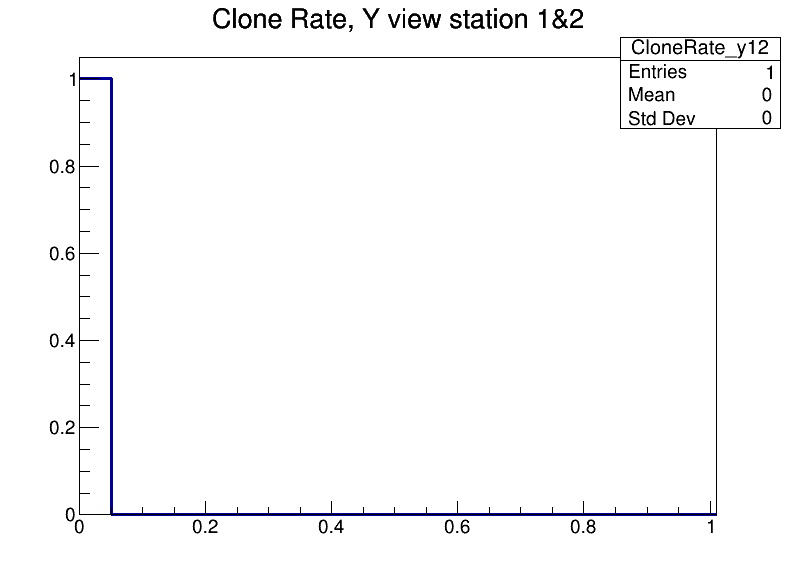

In [213]:
h['CloneRate_y12'].Draw()
c.Draw()

In [105]:
def execute(smeared_hits, stree, reco_mc_tracks):
    
    X = Digitization(stree,smeared_hits)
    y = get_track_ids(stree, smeared_hits)
    
    reco_tracks = track_pattern_recognition(X, method='FastHough')
    theTracks = track_fit(reco_tracks)
    fittedtrackids, fittedtrackfrac = get_fitted_trackids(y, reco_tracks)
        
    return reco_tracks, theTracks, fittedtrackids, fittedtrackfrac

In [106]:
reco_tracks, theTracks, fittedtrackids, fittedtrackfrac = execute(smeared_hits, sTree, reco_mc_tracks)

In [107]:
reco_tracks

{0: {'charge': -1.0,
  'hitPosList': array([[ -2.25013014e+02,  -2.54637731e+01,   2.58115000e+03,
            2.25013014e+02,  -2.54637731e+01,   2.58115000e+03,
            1.22158315e-01],
         [ -2.25013014e+02,  -2.50237731e+01,   2.58485000e+03,
            2.25013014e+02,  -2.50237731e+01,   2.58485000e+03,
            3.52209411e-01],
         [ -2.25013014e+02,  -2.54637731e+01,   2.61115000e+03,
            2.25013014e+02,  -2.54637731e+01,   2.61115000e+03,
            1.92870407e-01],
         [ -2.25013014e+02,  -2.59037731e+01,   2.61375000e+03,
            2.25013014e+02,  -2.59037731e+01,   2.61375000e+03,
            2.14744865e-01],
         [ -2.25013014e+02,  -2.81037731e+01,   2.78225000e+03,
            2.25013014e+02,  -2.81037731e+01,   2.78225000e+03,
            3.63001370e-02],
         [ -2.25013014e+02,  -2.85437731e+01,   2.78485000e+03,
            2.25013014e+02,  -2.85437731e+01,   2.78485000e+03,
            3.49547346e-01],
         [ -2.25013014e

In [108]:
theTracks

[<ROOT.genfit::Track object ("genfit::Track") at 0x150d8490>,
 <ROOT.genfit::Track object ("genfit::Track") at 0x152a8fc0>]

In [109]:
fittedtrackids

[4, 3]

In [110]:
fittedtrackfrac

[0.9487179487179487, 1.0]